### Solving Poisson Equation on S^2: $\Delta u = f$


iteration 0: loss = 84.98589324951172


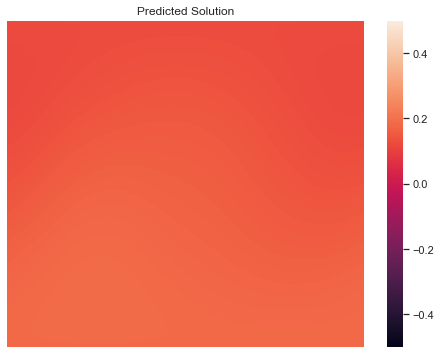

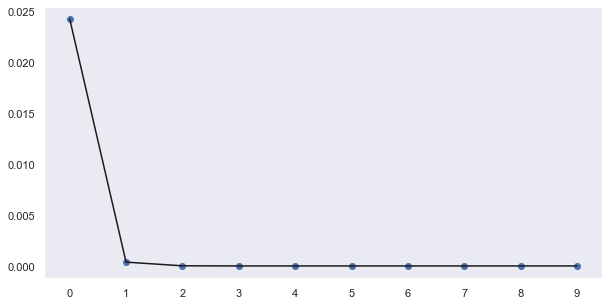

iteration 2: loss = 84.85549926757812
iteration 4: loss = 84.71708679199219
iteration 6: loss = 84.56069946289062
iteration 8: loss = 84.37690734863281
iteration 10: loss = 84.15479278564453
iteration 12: loss = 83.88067626953125
iteration 14: loss = 83.5366439819336
iteration 16: loss = 83.09878540039062
iteration 18: loss = 82.53717041015625
iteration 20: loss = 81.81381225585938


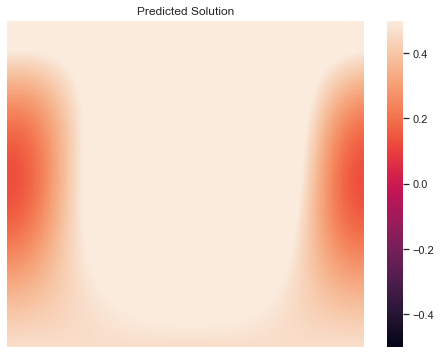

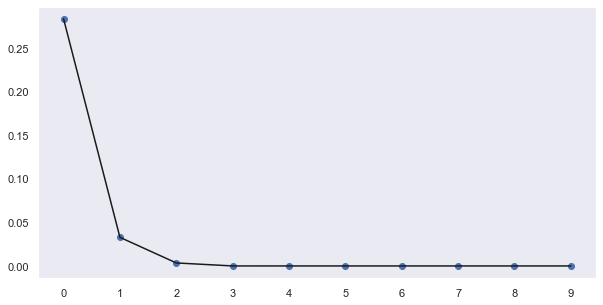

iteration 22: loss = 80.88046264648438
iteration 24: loss = 79.67720031738281
iteration 26: loss = 78.12213897705078
iteration 28: loss = 76.1055679321289
iteration 30: loss = 73.472412109375
iteration 32: loss = 70.16182708740234
iteration 34: loss = 66.21086120605469
iteration 36: loss = 62.1573371887207
iteration 38: loss = 59.08208465576172
iteration 40: loss = 57.786338806152344


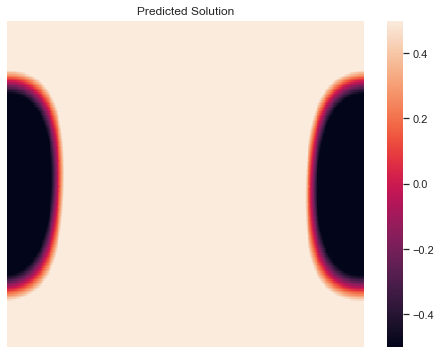

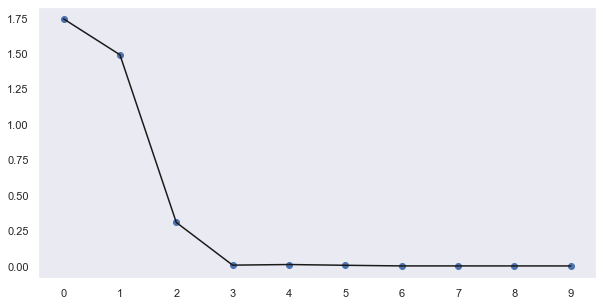

iteration 42: loss = 58.423789978027344
iteration 44: loss = 58.91445541381836
iteration 46: loss = 57.84406280517578
iteration 48: loss = 56.079952239990234
iteration 50: loss = 54.377342224121094
iteration 52: loss = 53.106319427490234
iteration 54: loss = 51.9565544128418
iteration 56: loss = 50.70273971557617
iteration 58: loss = 48.80784225463867
iteration 60: loss = 46.37919998168945


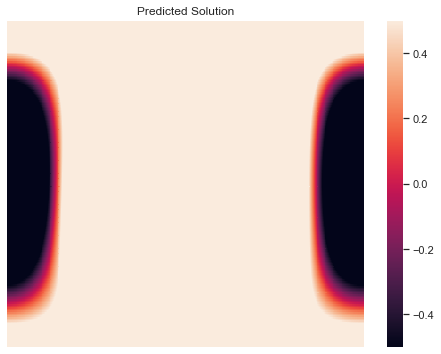

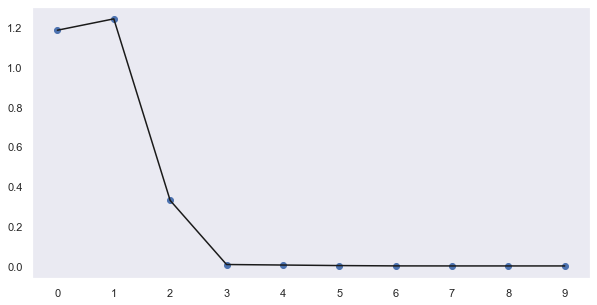

iteration 62: loss = 43.57545852661133
iteration 64: loss = 40.18937683105469
iteration 66: loss = 36.3177375793457
iteration 68: loss = 32.14646911621094
iteration 70: loss = 27.843069076538086
iteration 72: loss = 23.919078826904297
iteration 74: loss = 20.588706970214844
iteration 76: loss = 17.591596603393555
iteration 78: loss = 14.641368865966797
iteration 80: loss = 11.846723556518555


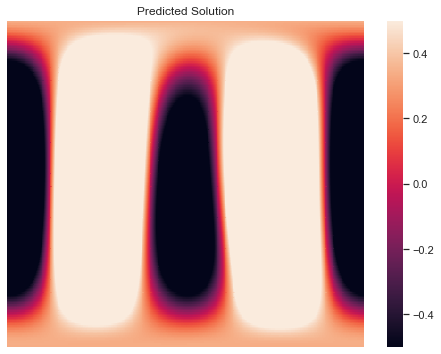

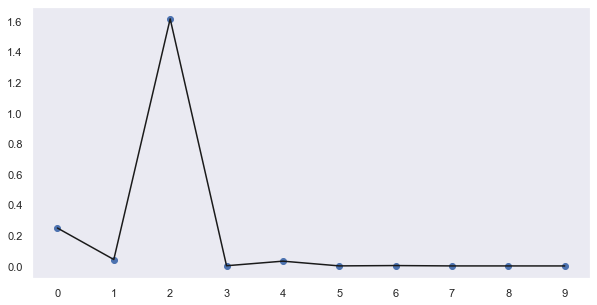

iteration 82: loss = 9.881864547729492
iteration 84: loss = 9.011280059814453
iteration 86: loss = 8.899516105651855
iteration 88: loss = 8.73508071899414
iteration 90: loss = 8.200474739074707
iteration 92: loss = 7.597352504730225
iteration 94: loss = 7.059136390686035
iteration 96: loss = 6.653438091278076
iteration 98: loss = 6.253986835479736
iteration 100: loss = 5.825138092041016


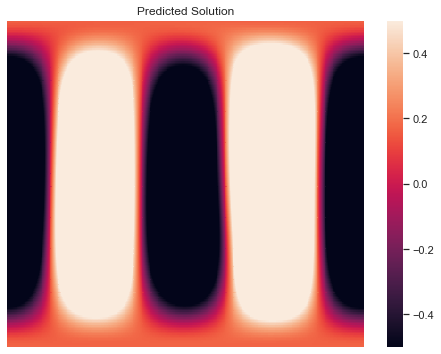

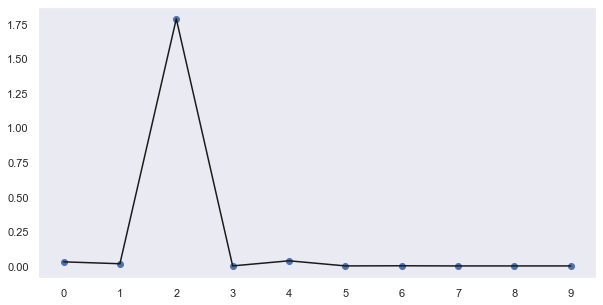

iteration 102: loss = 5.456665515899658
iteration 104: loss = 5.202426910400391
iteration 106: loss = 5.0257415771484375
iteration 108: loss = 4.861057758331299
iteration 110: loss = 4.693200588226318
iteration 112: loss = 4.5494184494018555
iteration 114: loss = 4.418829917907715
iteration 116: loss = 4.286912441253662
iteration 118: loss = 4.150078296661377
iteration 120: loss = 4.022017955780029


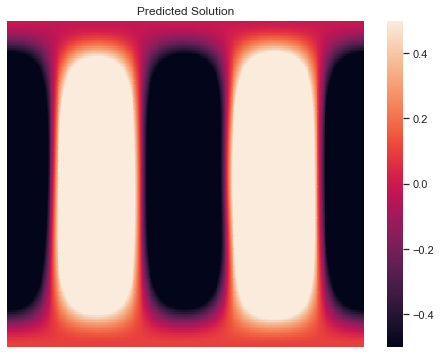

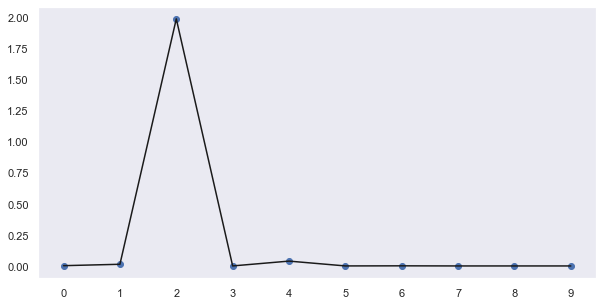

iteration 122: loss = 3.906226396560669
iteration 124: loss = 3.7999508380889893
iteration 126: loss = 3.700385332107544
iteration 128: loss = 3.6123592853546143
iteration 130: loss = 3.5338258743286133
iteration 132: loss = 3.457390308380127
iteration 134: loss = 3.3790977001190186
iteration 136: loss = 3.3014066219329834
iteration 138: loss = 3.229358434677124
iteration 140: loss = 3.163015365600586


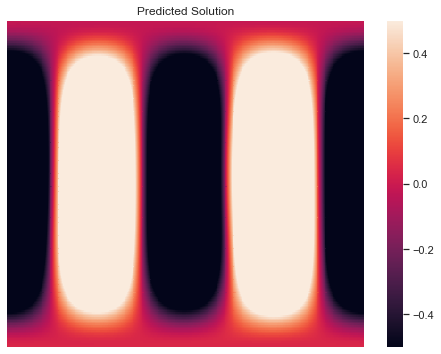

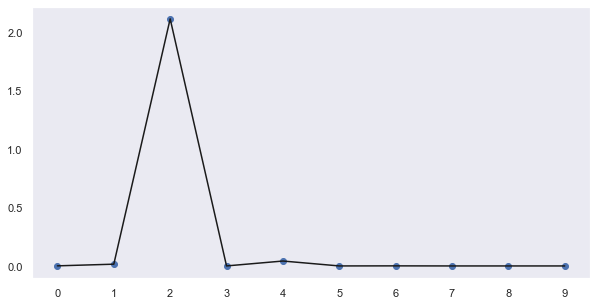

iteration 142: loss = 3.102841854095459
iteration 144: loss = 3.0474188327789307
iteration 146: loss = 2.994734287261963
iteration 148: loss = 2.9429261684417725
iteration 150: loss = 2.892979383468628
iteration 152: loss = 2.8447647094726562
iteration 154: loss = 2.79854679107666
iteration 156: loss = 2.754546880722046
iteration 158: loss = 2.7123241424560547
iteration 160: loss = 2.6710002422332764


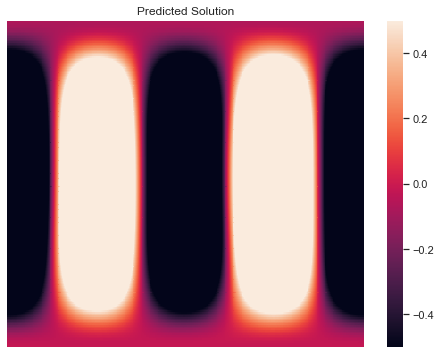

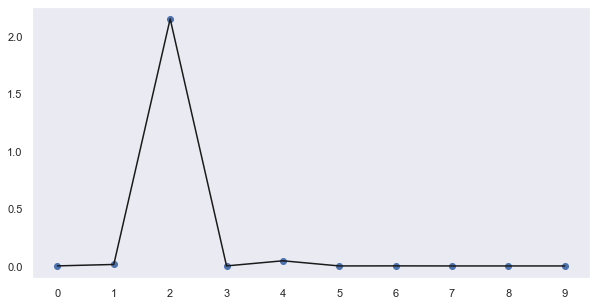

iteration 162: loss = 2.631865978240967
iteration 164: loss = 2.593183994293213
iteration 166: loss = 2.5567190647125244
iteration 168: loss = 2.5207197666168213
iteration 170: loss = 2.4868993759155273
iteration 172: loss = 2.454202890396118
iteration 174: loss = 2.4228768348693848
iteration 176: loss = 2.3921525478363037
iteration 178: loss = 2.3629536628723145
iteration 180: loss = 2.3343989849090576


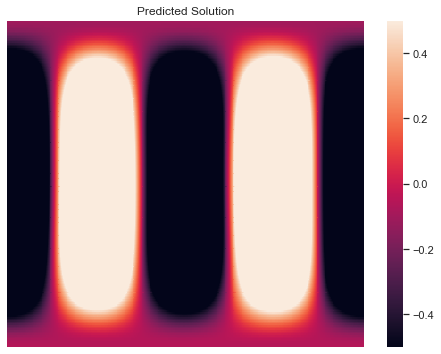

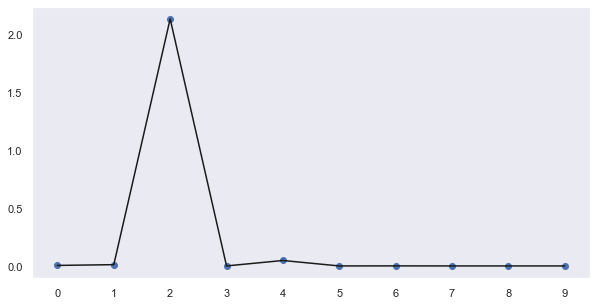

iteration 182: loss = 2.306471586227417
iteration 184: loss = 2.279409408569336
iteration 186: loss = 2.2532567977905273
iteration 188: loss = 2.2278075218200684
iteration 190: loss = 2.2030951976776123
iteration 192: loss = 2.1791043281555176
iteration 194: loss = 2.155912160873413
iteration 196: loss = 2.1330442428588867
iteration 198: loss = 2.111274242401123
iteration 200: loss = 2.0902793407440186


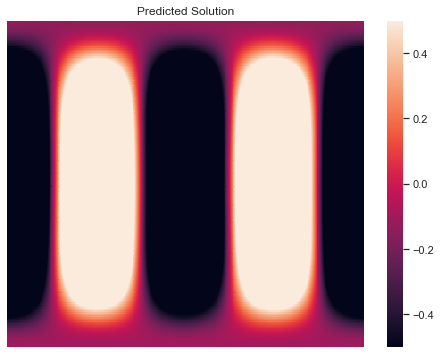

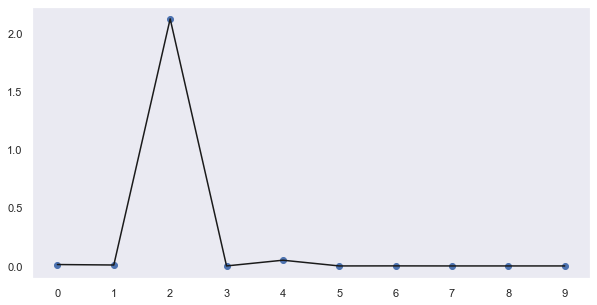

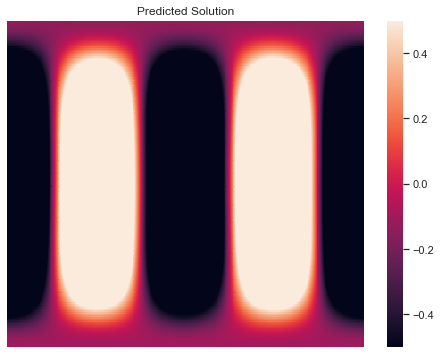

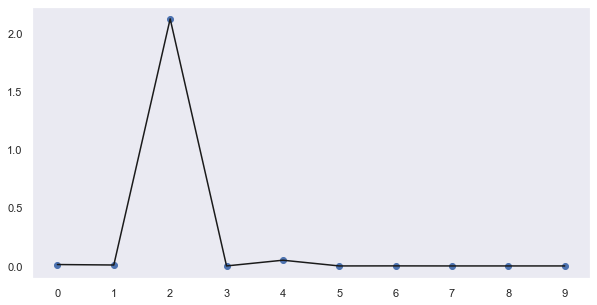

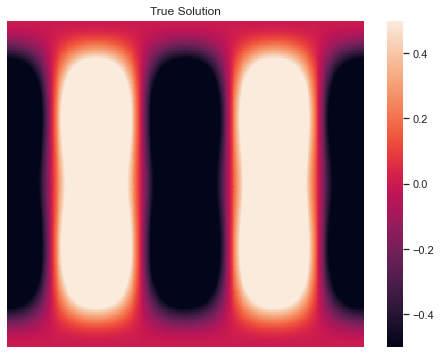

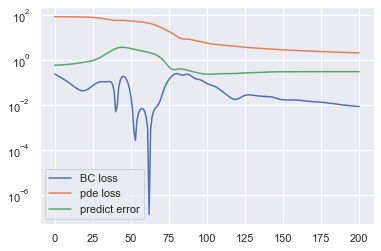

In [14]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np

import pyshtools
from pyshtools.shio import shread
from pyshtools.expand import MakeGridDH
from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

torch.manual_seed(0)
maxiter = 201
problem = Problem_Sphere_Poisson()


def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, N=25):
            N = 25
#             cos_azimuth = torch.linspace(-0.9999, 0.9999, N, requires_grad=False)
#             azimuth = torch.arccos(cos_azimuth)
            azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
            polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
            
            ## noise
#             dpolar = 2*pi/(2*N-1)
#             dazimuth = 2.0/(N-1)
#             polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
#             azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            
#             azimuth, polar = azimuth + azimuth_noise, polar + polar_noise

            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            return location
#             x = torch.randn(num, 3)
#             x = x / (torch.norm(x, dim=1).reshape((-1, 1)))
        
#             polar = torch.atan(x[:, :1] / x[:, 1:2]) + math.pi / 2
#             polar[:num // 2, 0] = polar[:num // 2, 0] + math.pi
#             azimuth = torch.acos(x[:, 2:3])
            
#             ## noise
#             dpolar = 2 * pi/(num-1) 
#             polar_noise = polar + torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
            
#             dazimuth = pi/(num-1) 
#             azimuth_noise = azimuth + torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(polar.shape))            
            
#             x = torch.cat([azimuth_noise, polar_noise], dim=1)
#             return x

        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
            
            self.spherical_harmonic_transform(net)
        
        def spherical_harmonic_transform(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            function_grid = net(location)
            function_grid = function_grid.reshape((200, 400))
            
#             print(f'grid dims{function_grid}')

            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2)
#             print(coefficients)
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]
#             print(ls)

            power_per_l = spectrum(coefficients)[:10]
#             print(power_per_l)
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            # ax.set_yscale('log')
            # ax.set_xscale('log')
            ax.grid()
            plt.show()
            
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample(N=27)
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)

                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 10) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 50, 50, 50, 16, 1]))
model.train()
